# Loan Prediction Using XGBoost and Logistic Regression with Grid SearchCV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_train= pd.read_csv('loan_train.txt')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [320]:
df_test= pd.read_csv('loan_test.txt')

In [321]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Cleaning

In [6]:
df_train_clean=df_train.copy()

In [7]:
df_train_clean.shape

(614, 13)

In [8]:
df_train_clean.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df_train_clean.isnull().sum().sum()  # Total Null value Sum

149

In [10]:
df_train_clean.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df_train_clean.groupby(df_train_clean['Gender']).count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


In [12]:
df_train_clean['Gender']=df_train_clean['Gender'].fillna('Male')

In [13]:
df_train_clean.groupby(df_train_clean['Married']).count()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,,,,,,,,,,,,
No,213,213,209,213,199,213,213,206,208,199,213,213
Yes,398,398,390,398,380,398,398,384,389,362,398,398


In [14]:
df_train_clean['Married']=df_train_clean['Married'].fillna('Yes')

In [15]:
df_train_clean.groupby(df_train_clean['Self_Employed']).count()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,,
No,500,500,500,487,500,500,500,482,489,463,500,500
Yes,82,82,82,80,82,82,82,79,80,75,82,82


In [16]:
df_train_clean['Self_Employed']=df_train_clean['Self_Employed'].fillna('No')

In [17]:
df_train_clean.groupby(df_train_clean['Dependents']).count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,345,345,345,345,345,345,345,334,334,316,345,345
1,102,102,102,102,102,102,102,98,101,90,102,102
2,101,101,101,101,101,101,101,98,101,95,101,101
3+,51,51,51,51,51,51,51,49,50,48,51,51


In [18]:
df_train_clean['Dependents']=df_train_clean['Dependents'].fillna('0')

In [19]:
df_train_clean[['LoanAmount']]=df_train_clean[['LoanAmount']].fillna(df_train_clean['LoanAmount'].median())

In [20]:
df_train_clean[['Loan_Amount_Term']]=df_train_clean[['Loan_Amount_Term']].fillna(df_train_clean['Loan_Amount_Term'].median())

In [21]:
df_train_clean[['Credit_History']]=df_train_clean[['Credit_History']].fillna(df_train_clean['Credit_History'].median())

In [22]:
df_train_clean.isnull().sum().sum()  # Total Null value Sum"

0

# Data Visualisation

In [ ]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#df_train_temp=df_train_temp.apply(LabelEncoder().fit_transform())
#df_train_temp=df_train_temp.apply(OneHotEncoder().fit_transform())

In [23]:
df_train_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df_train_clean=df_train_clean.drop(['Loan_ID'],axis=1)

In [25]:
df_y=df_train_clean['Loan_Status']

In [26]:
df_train_clean=df_train_clean.drop(['Loan_Status'],axis=1)

In [27]:
df_train_temp=df_train_clean[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]

In [28]:
df_train_temp=pd.get_dummies(df_train_temp)

In [29]:
df_train_temp.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0
1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0
3,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0
4,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0


In [30]:
df_loan_train=pd.concat([df_train_temp,df_train_clean[['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome','Credit_History']]],axis=1)

In [31]:
df_loan_train.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,Credit_History
0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,128.0,360.0,5849,0.0,1.0
1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,128.0,360.0,4583,1508.0,1.0
2,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,66.0,360.0,3000,0.0,1.0
3,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,120.0,360.0,2583,2358.0,1.0
4,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,141.0,360.0,6000,0.0,1.0


In [32]:
y=[0 if x=='N' else 1 for x in df_y]

In [33]:
df_loan_train.shape

(614, 20)

In [36]:
len(y)

614

In [ ]:
df_y=pd.DataFrame(df_y)

In [ ]:
df_y=df_y.apply(LabelEncoder().fit_transform)

In [ ]:
corr=df_loan_train.corr()

In [ ]:
sns.heatmap(corr)
plt.show()

# Preparing Test

In [322]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [323]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [295]:
df_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [324]:
df_test.groupby(df_test['Gender']).count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,,,,,,,,,,,
Female,70,70,68,70,67,70,70,69,70,64,70
Male,286,286,279,286,266,286,286,282,280,263,286


In [325]:
df_test['Gender']=df_test['Gender'].fillna('Male')

In [326]:
df_test.groupby(df_test['Dependents']).count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Dependents,,,,,,,,,,,
0,200,200,200,200,193,200,200,198,197,185,200
1,58,58,58,58,50,58,58,56,56,55,58
2,59,59,59,59,54,59,59,59,59,55,59
3+,40,40,40,40,37,40,40,40,39,35,40


In [327]:
df_test['Dependents']=df_test['Dependents'].fillna('0')

In [328]:
df_test.groupby(df_test['Self_Employed']).count()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Self_Employed,,,,,,,,,,,
No,307,307,307,307,307,307,307,302,301,281,307
Yes,37,37,37,37,37,37,37,37,37,35,37


In [329]:
df_test['Self_Employed']=df_test['Self_Employed'].fillna('No')

In [330]:
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())

In [331]:
#df_test.groupby(df_test['Loan_Amount_Term']).count()

In [332]:
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())

In [333]:
df_test.groupby(df_test['Credit_History']).count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
Credit_History,,,,,,,,,,,
0.0,59,59,59,59,59,59,59,59,59,59,59
1.0,279,279,279,279,279,279,279,279,279,279,279


In [334]:
df_test['Credit_History']=df_test['Credit_History'].fillna(1.0)

In [335]:
df_test.isnull().sum().sum()

0

In [336]:
df_test=df_test.drop(['Loan_ID'],axis=1)

In [337]:
df_test_temp=df_test[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]

In [338]:
df_test_temp=pd.get_dummies(df_test_temp)

In [339]:
df_test_temp.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0
1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0
3,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0
4,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0


In [340]:
df_test_clean=pd.concat([df_test_temp,df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]],axis=1)

In [341]:
df_test_clean.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0
1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,3076,1500,126.0,360.0,1.0
2,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,5000,1800,208.0,360.0,1.0
3,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,2340,2546,100.0,360.0,1.0
4,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,3276,0,78.0,360.0,1.0


In [342]:
df_test_clean.dtypes

Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
dtype: object

# Train Data

In [37]:
from sklearn.model_selection import train_test_split 

In [83]:
X_train,X_test,y_train,y_test=train_test_split(df_loan_train,y,test_size=0.33,random_state=7)

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve,f1_score
from sklearn.model_selection import GridSearchCV

In [85]:
lr=LogisticRegression()

In [86]:
c_param=np.arange(0.1,1,0.1)

In [87]:
param=dict(C=c_param)

In [88]:
grid=GridSearchCV(lr,param_grid=param,scoring="neg_log_loss",cv=10)

In [89]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [90]:
grid.best_params_

{'C': 0.7000000000000001}

In [91]:
mean=grid.cv_results_['mean_test_score']
std=grid.cv_results_['std_test_score']
params=grid.cv_results_['params']

In [92]:
for m,s,p in zip(mean,std,params):
     print("Mean ",m," Std: ",s," params: ",p)

Mean  -0.5144067197693385  Std:  0.028936718953008683  params:  {'C': 0.1}
Mean  -0.5020757090272299  Std:  0.03892866913244012  params:  {'C': 0.2}
Mean  -0.4921641062940545  Std:  0.04189498785576689  params:  {'C': 0.30000000000000004}
Mean  -0.4912307792661774  Std:  0.04629129629657067  params:  {'C': 0.4}
Mean  -0.4884936443483208  Std:  0.04580874530217889  params:  {'C': 0.5}
Mean  -0.4876621329596866  Std:  0.04855082602568174  params:  {'C': 0.6}
Mean  -0.4868383822996916  Std:  0.050205561941837035  params:  {'C': 0.7000000000000001}
Mean  -0.4884455752745084  Std:  0.05136806096231309  params:  {'C': 0.8}
Mean  -0.48797451893562216  Std:  0.05163616796729945  params:  {'C': 0.9}


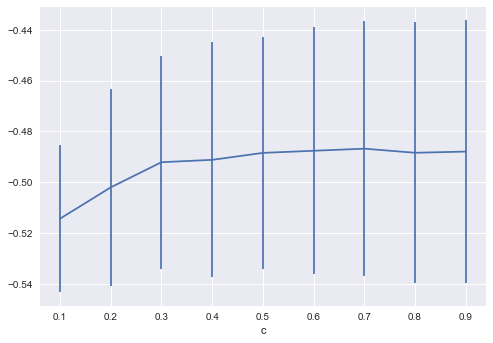

In [93]:
plt.errorbar(c_param,mean,yerr=std)
plt.xlabel("c")
plt.show()

In [95]:
logitReg=LogisticRegression(C=0.7)
logitReg.fit(X_train,y_train)
pred_lr=logitReg.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test,pred_lr))

Accuracy is  0.8029556650246306


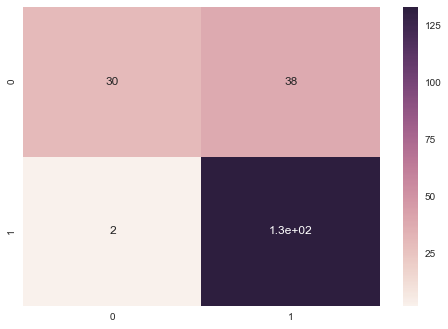

In [97]:
con=confusion_matrix(y_test,pred_lr)
sns.heatmap(con,annot=True)
plt.show()

In [ ]:
pred_lr

In [ ]:
y_test

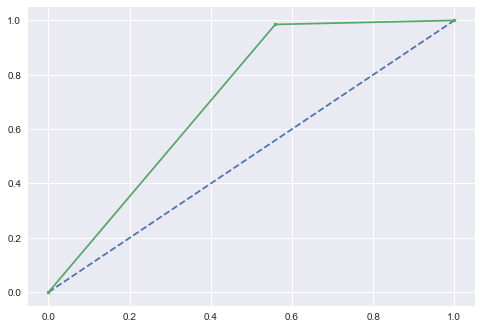

In [98]:
fpr, tpr, thresholds = roc_curve(y_test,pred_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [99]:
f1_score(y_test,pred_lr)

0.869281045751634

In [100]:
precision,recall,thresh=precision_recall_curve(y_test,pred_lr)

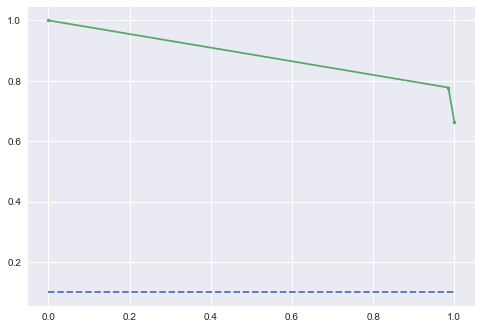

In [101]:
plt.plot([0, 1], [0.1, 0.1], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

# XG Boost

In [46]:
df_train_dummy=pd.get_dummies(df_train.iloc[:,1:12])

In [50]:
df_train_dummy.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [47]:
X_train,X_test,y_train,y_test=train_test_split(df_train_dummy,y,test_size=0.33,random_state=7)

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [52]:
xgb=XGBClassifier()

In [53]:
n_estimators=range(50,400,50)

In [54]:
param_grid=dict(n_estimators=n_estimators)

In [55]:
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=7)

In [56]:
csv=GridSearchCV(xgb,param_grid,scoring="neg_log_loss",n_jobs=1,cv=kfold)

In [57]:
res=csv.fit(X_train,y_train)

In [58]:
res.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [59]:
res.best_score_

-0.49917590090610686

In [60]:
res.best_params_

{'n_estimators': 50}

In [61]:
mean=res.cv_results_['mean_test_score']
std=res.cv_results_['std_test_score']
params=res.cv_results_['params']

In [62]:
for m,s,p in zip(mean,std,params):
    print("Mean ",m," Std: ",s," params: ",p)

Mean  -0.49917590090610686  Std:  0.10144424737414284  params:  {'n_estimators': 50}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'n_estimators': 100}
Mean  -0.5541444684927173  Std:  0.14621802793536987  params:  {'n_estimators': 150}
Mean  -0.5848091795466672  Std:  0.16397602555068255  params:  {'n_estimators': 200}
Mean  -0.6069155447226111  Std:  0.1787103674658754  params:  {'n_estimators': 250}
Mean  -0.6293244474696917  Std:  0.19345876548063787  params:  {'n_estimators': 300}
Mean  -0.6459562761917707  Std:  0.20150151272221112  params:  {'n_estimators': 350}


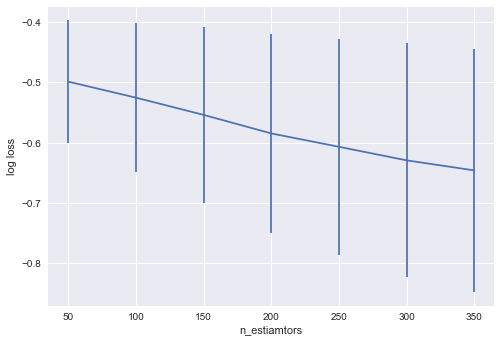

In [63]:
plt.errorbar(n_estimators,mean,yerr=std)
plt.xlabel("n_estiamtors")
plt.ylabel("log loss")
plt.show()

In [64]:
maxdepth=range(1,5,1)

In [65]:
param_grid=dict(maxdepth=maxdepth)

In [66]:
csv=GridSearchCV(xgb,param_grid,scoring="neg_log_loss",n_jobs=1,cv=kfold)

In [67]:
res=csv.fit(X_train,y_train)

In [68]:
mean=res.cv_results_['mean_test_score']
std=res.cv_results_['std_test_score']
param=res.cv_results_['params']

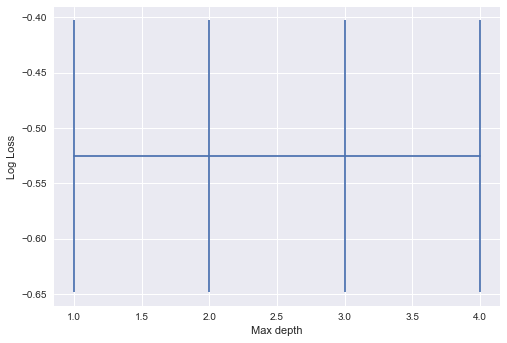

In [69]:
plt.errorbar(maxdepth,mean,yerr=std)
plt.xlabel("Max depth")
plt.ylabel("Log Loss")
plt.show()

In [70]:
res.best_params_

{'maxdepth': 1}

In [71]:
param_grid=dict(n_estiamtors=n_estimators,maxdepth=maxdepth)

In [72]:
csv=GridSearchCV(xgb,param_grid,scoring="neg_log_loss",n_jobs=1,cv=kfold)

In [73]:
res=csv.fit(X_train,y_train)

In [74]:
mean=res.cv_results_['mean_test_score']
std=res.cv_results_['std_test_score']
param=res.cv_results_['params']

In [75]:
res.best_params_

{'maxdepth': 1, 'n_estiamtors': 50}

In [76]:
for m,s,p in zip(mean,std,param):
    print("Mean ",m," Std: ",s," params: ",p)

Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 50}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 100}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 150}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 200}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 250}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 300}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 1, 'n_estiamtors': 350}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 2, 'n_estiamtors': 50}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 2, 'n_estiamtors': 100}
Mean  -0.5256486016704073  Std:  0.12281736916991368  params:  {'maxdepth': 2, 'n_estiamtors': 150}
Me

In [77]:
scores = np.array(mean).reshape(len(maxdepth), len(n_estimators))  # reshaped the mean to 4x7 matrix
for i, value in enumerate(maxdepth):
    #plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
    print(scores[i])
#plt.legend()
#plt.xlabel('n_estimators')
#plt.show()

[-0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486
 -0.5256486]
[-0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486
 -0.5256486]
[-0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486
 -0.5256486]
[-0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486 -0.5256486
 -0.5256486]


In [78]:
sbg=XGBClassifier(n_estimators=50,max_depth=1)

In [79]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [80]:
y_predict_xgb=xgb.predict(X_test)

C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [81]:
predictions = [round(value) for value in y_predict_xgb]

In [82]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.82%


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
y_predict_rfc=rfc.predict(X_test)

In [ ]:
prediction_rfc= [round(v) for v in y_predict_rfc]
accuracy = accuracy_score(y_test,prediction_rfc)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Solution

In [343]:
df_test=df_test_clean[X_train.columns]

In [344]:
logitReg=LogisticRegression(C=0.7)
logitReg.fit(X_train,y_train)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [345]:
pred_lr=logitReg.predict(df_test)

In [346]:
df_temp= pd.read_csv('loan_test.txt')

In [347]:
df_print=pd.DataFrame(df_temp['Loan_ID'],columns=['Loan_ID','Loan_Status'])

In [348]:
df_print.head()

,Loan_ID,Loan_Status
0,LP001015,NaN
1,LP001022,NaN
2,LP001031,NaN
3,LP001035,NaN
4,LP001051,NaN


In [352]:
print(len(pred_lr))
print(df_print.shape)

367
(367, 2)


In [349]:
df_print['Loan_Status']=pred_lr

In [353]:
df_print['Loan_Status']=df_print['Loan_Status'].replace(1,'Y')
df_print['Loan_Status']=df_print['Loan_Status'].replace(0,'N')

In [354]:
df_print.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [355]:
df_print.groupby(df_print['Loan_Status']).count()

,Loan_ID,Loan_Status
Loan_Status,,
N,58,58
Y,309,309


In [356]:
df_print.to_csv("sol_loan_logit.csv",index=False)